In [1]:
# image classification with dense neural networks in tf-keras environement from MNIST data set

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)
print(keras.__version__)


2.4.1
2.4.0


In [2]:
#Fashion MNIST data set 

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [3]:
#the data set is already split into train and test sets
#we make a validation set by using training set to not be overfit
# x-axis: image , y-axis: data labels

#The usual way of normalizing a dataset is to scale the features, and this is done by substacting the mean from each feature 
#and dividing by the standard deviation. This will put the features on the same scale somewhere between 0 — 1.

#As we are working with 28 x 28 NumPy arrays representing each image and each pixel in the array has an intensity 
#somewhere between 1 — 255, a simpler way of getting all of these images on a scale between 0–1 is to divide each array by 255.


X_train_full = X_train_full / 255.
X_test = X_test / 255.

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#The y-axis data is just a series of numbers associated with each class label, therefore we need to define the class labels manually
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

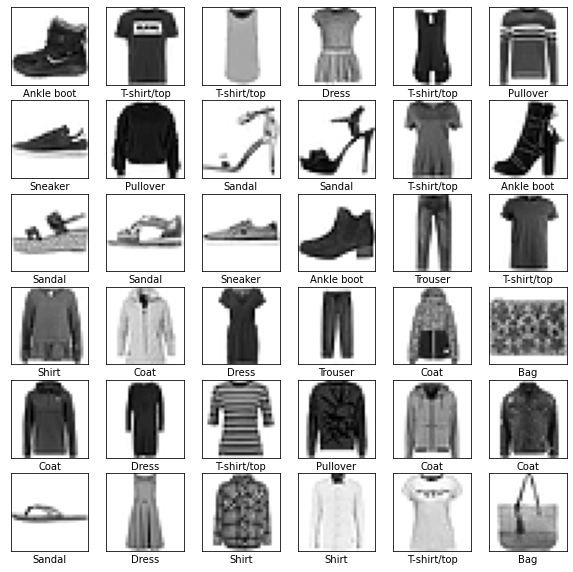

In [4]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [5]:
#image classification
#The first layer in the model is a flatten layer and is there for pre-processing of the data and it isn’t trainable itself.
#What this does is take each 28 x 28 NumPy array for each image and flattens it into a 1 x 784 array that the network 
#can work with

#Finally, we add a Dense layer with 10 neurons as there are 10 classes to predict and as they are all exclusive, 
#we use the softmax activation function

model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, activation = "relu" ),
keras.layers.BatchNormalization(),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(10, activation = "softmax" )])

model.summary()

early_stopping = EarlyStopping (
min_delta = 0.001,
patience = 10,
restore_best_weights = True
)

model.compile(
loss = "sparse_categorical_crossentropy",
optimizer = "adam",
metrics = ["accuracy"]
)


history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid),  epochs = 30, callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 270,946
Trainable params: 268,778
Non-trainable params: 2,168
______________________________________________

In [6]:
predictions = model.predict(X_test)

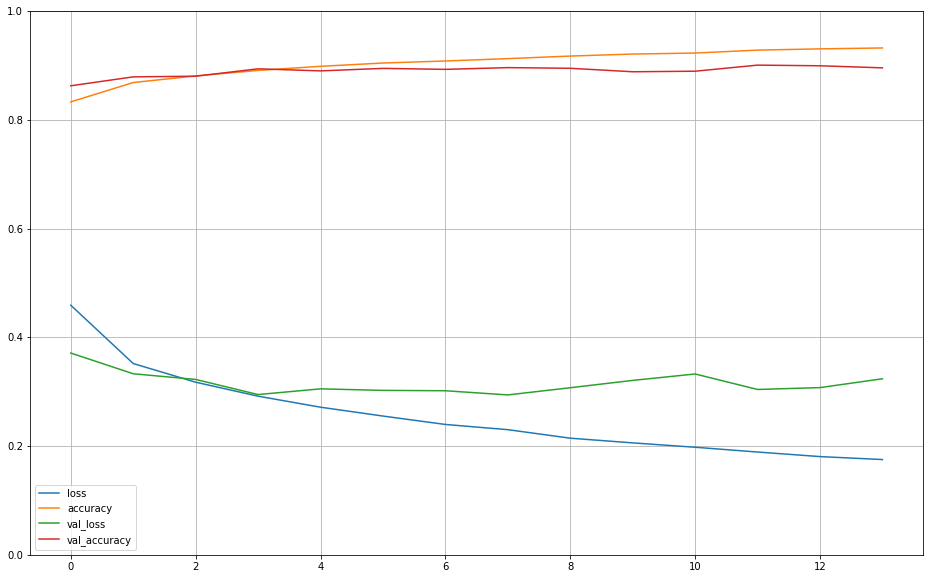

In [7]:
#learning curves

pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
def plot_image(i, predictions_array, true_label, img):
    
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

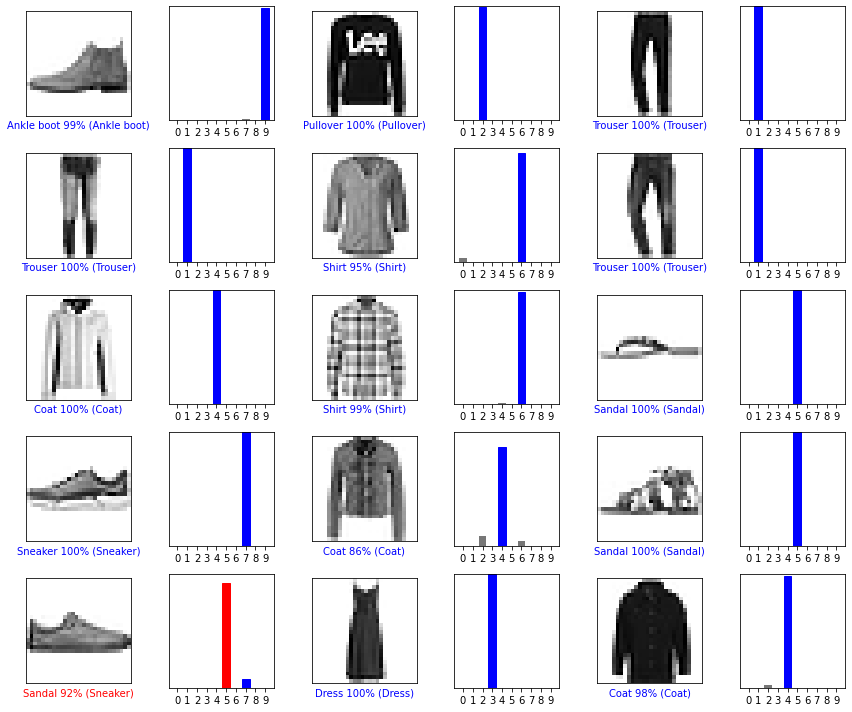

In [9]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()